# Task 1

## Prediction using Supervised ML
In this task, the Python Scikit-Learn library for machine learning is used to implement regression functions. In this case, only two variables are involved.

### Simple Linear Regression
In this regression task, the percentage of marks that a student is expected to score is predicted based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Aadarsh Agarwal

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Plot
Using the matplotlib library, the plot between scores and hours is visualized. It can be clearly seen that there is positive correlation between the two, meaning, more the hours studied, more the score.

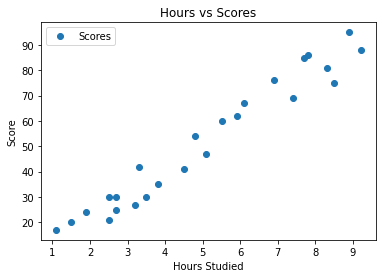

In [3]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

### Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
X = s_data[["Hours"]].values
y = s_data["Scores"].values

Now that attributes and labels are decided, the next step is to split this data into training and test sets. This is done by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Training the Algorithm
After having split the data, the training set is used to train the model.

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


After the training is complete, the values determined by the algorithm for slope and intercept (as this is linear regression), the plot for scores vs hours is visualized along with the regression line.

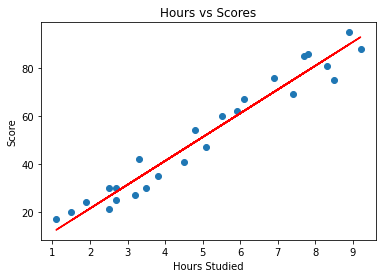

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='r')
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

### Predictions
Using the trained model, the predictions for the test set can be made. In the table below it compares the actual vs the predicted values.

In [8]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.1]
 [2.5]
 [1.9]
 [9.2]
 [6.9]]


In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


In [10]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.45860055685799


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, the mean square error is chosen.

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.877039354964484
